In [2]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import pingouin as pg
import numpy as np
from statsmodels.multivariate.manova import MANOVA
import os
import pathlib
import matplotlib.pyplot as plt

sns.set_theme()
plt.rcParams['svg.fonttype'] = 'none'

raw_data = pd.read_csv(
    r'C:\Users\timmo\OneDrive\Documents\GitHub\2023-FeD-TH-manuscript\DFOR_ATP_21DIV.csv')

raw_data.head()


,FeS,FeD,FeR
0,1.112007,0.865121,0.924235
1,1.086287,0.882847,0.791270
2,1.037281,0.653200,0.807984
3,0.821865,0.596034,0.733059
4,1.097972,0.706573,0.866703


In [3]:
data = (raw_data
        .melt(var_name='group', value_name='ATP')
        )

data.groupby(['group']).describe()


ATP                                                              \
      count      mean       std       min       25%       50%       75%   
group                                                                     
FeD    38.0  0.575762  0.197279  0.097633  0.503212  0.613010  0.696147   
FeR    39.0  0.817786  0.130713  0.527442  0.729145  0.833466  0.923025   
FeS    45.0  1.000000  0.095448  0.749607  0.932399  1.009446  1.061098   

                 
            max  
group            
FeD    0.899272  
FeR    1.065332  
FeS    1.164003

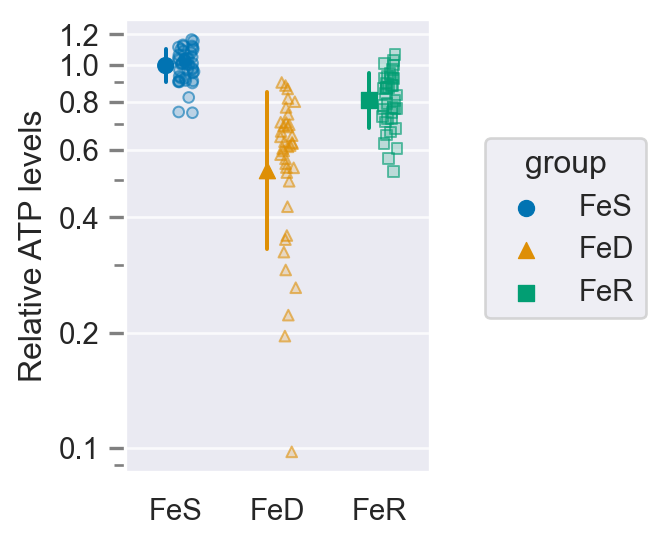

In [11]:
folder_name = 'ATP_plots'
fname = 'ATP.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

tick_list = [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 2, 2.5, 3, 4]

(
    so.Plot(
        data=data,
        x='group',
        y='ATP',
        color='group',
        marker='group'
    )
    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .label(
        x='',
        y='Relative ATP levels'
    )
    .layout(size=(2.5, 3))
    .scale(
        y=so.Continuous(trans='log').tick(
            at=tick_list).label(base=None, like="{x:.1f}"),
        color='colorblind',
        marker=so.Nominal(['o', '^', 's']),
    )
    .theme({
        'ytick.left': True,
        'ytick.color': '.5',
        'ytick.labelcolor': '.15',
        'axes.grid': True,
        'grid.alpha': 0.8,
    })
    .save(loc=save_loc, bbox_inches='tight')
)
